In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#read in the data using pandas
df = pd.read_csv('diabetes.csv')
#check data has been read in properly
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']
x
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression classifier
logmodel = LogisticRegression(max_iter=1000)
# Fit the classifier to the data
logmodel.fit(x,y)

LogisticRegression(max_iter=1000)

In [5]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logmodel.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":x.columns,"Coefficients":np.transpose(logmodel.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -8.364830
1               Pregnancies      0.122489
2                   Glucose      0.035110
3             BloodPressure     -0.013298
4             SkinThickness      0.000780
5                   Insulin     -0.001174
6                       BMI      0.089644
7  DiabetesPedigreeFunction      0.867781
8                       Age      0.014985


In [6]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [7]:
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression classifier
logmodel = LogisticRegression(max_iter=1000)
# Fit the classifier to the data
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [8]:
#Make prediction using test data
y_pred = logmodel.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [9]:
y_test

488    0
413    0
112    0
222    0
711    0
      ..
139    0
178    0
654    0
110    1
102    0
Name: Outcome, Length: 154, dtype: int64

In [10]:
# Use score method to get test accuracy of model
score = logmodel.score(x_test, y_test)
print(score)

0.7857142857142857


In [11]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logmodel.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":x.columns,"Coefficients":np.transpose(logmodel.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -8.397174
1               Pregnancies      0.134698
2                   Glucose      0.034462
3             BloodPressure     -0.016908
4             SkinThickness     -0.004595
5                   Insulin     -0.000594
6                       BMI      0.096835
7  DiabetesPedigreeFunction      1.132809
8                       Age      0.014426


In [13]:
# Use score method to get training accuracy of model
score = logmodel.score(x_train, y_train)
print(score)

0.7850162866449512


********************************************************************

In [14]:
# import the metrics class - confucion metris
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[92,  8],
       [25, 29]], dtype=int64)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7857142857142857
Precision: 0.7837837837837838
Recall: 0.5370370370370371


In [16]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
488,4,99,72,17,0,25.6,0.294,28
413,1,143,74,22,61,26.2,0.256,21
112,1,89,76,34,37,31.2,0.192,23
222,7,119,0,0,0,25.2,0.209,37
711,5,126,78,27,22,29.6,0.439,40
...,...,...,...,...,...,...,...,...
139,5,105,72,29,325,36.9,0.159,28
178,5,143,78,0,0,45.0,0.190,47
654,1,106,70,28,135,34.2,0.142,22
110,3,171,72,33,135,33.3,0.199,24


In [17]:
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
y_pred_proba

array([0.07404058, 0.16896949, 0.04360246, 0.46442359, 0.28970725,
       0.22717674, 0.02975408, 0.09712182, 0.77748184, 0.05023862,
       0.21972332, 0.05513744, 0.74213025, 0.02974752, 0.04932221,
       0.28648774, 0.27807414, 0.52517712, 0.1382165 , 0.68413974,
       0.74469356, 0.08271399, 0.43685703, 0.02800793, 0.22770731,
       0.16760027, 0.47673657, 0.08707703, 0.04942233, 0.062799  ,
       0.06345405, 0.00328104, 0.02677252, 0.24140032, 0.70475395,
       0.86913503, 0.17484925, 0.85559604, 0.15930989, 0.14979113,
       0.08869387, 0.8762908 , 0.14303012, 0.45717245, 0.25185251,
       0.22882774, 0.24363787, 0.11729011, 0.52283236, 0.921944  ,
       0.04006991, 0.19161978, 0.64814006, 0.40680828, 0.21223467,
       0.29354388, 0.15184069, 0.0319025 , 0.66551309, 0.71123047,
       0.05881154, 0.24042076, 0.03062538, 0.09003754, 0.97736144,
       0.10395199, 0.00183627, 0.81196214, 0.03698153, 0.40606257,
       0.6342238 , 0.04431314, 0.39067642, 0.39869695, 0.48602

In [18]:
logmodel.predict_proba(x_test)

array([[0.92595942, 0.07404058],
       [0.83103051, 0.16896949],
       [0.95639754, 0.04360246],
       [0.53557641, 0.46442359],
       [0.71029275, 0.28970725],
       [0.77282326, 0.22717674],
       [0.97024592, 0.02975408],
       [0.90287818, 0.09712182],
       [0.22251816, 0.77748184],
       [0.94976138, 0.05023862],
       [0.78027668, 0.21972332],
       [0.94486256, 0.05513744],
       [0.25786975, 0.74213025],
       [0.97025248, 0.02974752],
       [0.95067779, 0.04932221],
       [0.71351226, 0.28648774],
       [0.72192586, 0.27807414],
       [0.47482288, 0.52517712],
       [0.8617835 , 0.1382165 ],
       [0.31586026, 0.68413974],
       [0.25530644, 0.74469356],
       [0.91728601, 0.08271399],
       [0.56314297, 0.43685703],
       [0.97199207, 0.02800793],
       [0.77229269, 0.22770731],
       [0.83239973, 0.16760027],
       [0.52326343, 0.47673657],
       [0.91292297, 0.08707703],
       [0.95057767, 0.04942233],
       [0.937201  , 0.062799  ],
       [0.

In [19]:
threshold = 0.2
y_pred = (y_pred_proba > threshold).astype('float')
y_pred

array([0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0.])

In [20]:
y_test

488    0
413    0
112    0
222    0
711    0
      ..
139    0
178    0
654    0
110    1
102    0
Name: Outcome, Length: 154, dtype: int64

In [21]:
metrics.confusion_matrix(y_test, y_pred)

array([[57, 43],
       [ 8, 46]], dtype=int64)

In [22]:
threshold = 0.3
y_pred = (y_pred_proba > threshold).astype('float')
metrics.confusion_matrix(y_test, y_pred)

array([[75, 25],
       [13, 41]], dtype=int64)

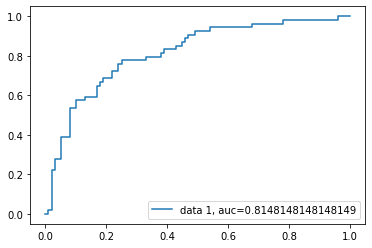

In [23]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()